# Introduction to MESA for multi-agents



In [1]:
!pip install mesa

"pip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## Sample model description
The tutorial model is a very simple simulated agent-based economy, drawn from econophysics and presenting a statistical mechanics approach to wealth distribution.
The rules of the model are:
1. There are some number of agents.
2. All agents begin with 1 unit of money.
3. At every step of the model, an agent gives 1 unit of money (if they have it) to some other agent.

## Setting up the model

There are two core classes: one for the overall model, the other for the agents. 

Each agent has only one variable: how much wealth it currently has. 
And the model-level parameter is how many agents the model contains. 


In [2]:
from mesa import Agent, Model


class MoneyAgent(Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1


class MoneyModel(Model):
    """A model with some number of agents."""

    def __init__(self, N):
        self.num_agents = N
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)

ModuleNotFoundError: No module named 'mesa'

## Adding the scheduler
The scheduler is a special model component which controls the order in which agents are activated.

We are using the simplest one: `RandomActivation`, which activates all the agents once per step, in random order. 

Every agent is expected to have a `step`
method. The step method is the action the agent takes when it is activated by the model schedule. 

In [ ]:
from mesa import Agent, Model
from mesa.time import RandomActivation


class MoneyAgent(Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def step(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print("Hi, I am agent " + str(self.unique_id) + ".")


class MoneyModel(Model):
    """A model with some number of agents."""

    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)

    def step(self):
        """Advance the model by one step."""
        self.schedule.step()

## Testing

In [ ]:
test_model = MoneyModel(10)
test_model.step()

Hi, I am agent 7.
Hi, I am agent 2.
Hi, I am agent 5.
Hi, I am agent 4.
Hi, I am agent 9.
Hi, I am agent 1.
Hi, I am agent 3.
Hi, I am agent 0.
Hi, I am agent 8.
Hi, I am agent 6.


## Exercise

Try modifying the code to have every agent print out its `wealth` when activated. 

In [ ]:
from mesa import Agent, Model
from mesa.time import RandomActivation


class MoneyAgent2(Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def step(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print("Hi, I am agent " + str(self.unique_id) + " and my wealth is: "+ str(self.wealth))


class MoneyModel2(Model):
    """A model with some number of agents."""

    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent2(i, self)
            self.schedule.add(a)

    def step(self):
        """Advance the model by one step."""
        self.schedule.step()

test_model2 = MoneyModel2(10)
test_model2.step()

Hi, I am agent 5 and my wealth is: 1
Hi, I am agent 3 and my wealth is: 1
Hi, I am agent 4 and my wealth is: 1
Hi, I am agent 9 and my wealth is: 1
Hi, I am agent 0 and my wealth is: 1
Hi, I am agent 6 and my wealth is: 1
Hi, I am agent 1 and my wealth is: 1
Hi, I am agent 8 and my wealth is: 1
Hi, I am agent 7 and my wealth is: 1
Hi, I am agent 2 and my wealth is: 1


## Agent Step
Now we just need to have the agents do what we intend for them to do: check their wealth, and if they have the money, give one unit of it away to another random agent.

To allow the agent to choose another agent at random, we use the generator `model.random`.

The scheduler has an internal list of all the agents it is scheduled to activate.

With this in mind, we rewrite the `step` method.

In [ ]:
from mesa import Agent, Model
from mesa.time import RandomActivation
import matplotlib.pyplot as plt


class MoneyAgent3(Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def step(self):
        if self.wealth == 0:
            #print("Hi, I am agent " + str(self.unique_id) + " and my wealth is: "+ str(self.wealth))
            return
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.wealth += 1
        self.wealth -= 1
        #print("Hi, I am agent " + str(self.unique_id) + " and my wealth is: "+ str(self.wealth))

class MoneyModel3(Model):
    """A model with some number of agents."""

    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent3(i, self)
            self.schedule.add(a)

    def step(self):
        """Advance the model by one step."""
        self.schedule.step()

## Running your first model

(array([5., 0., 0., 1., 0., 0., 3., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

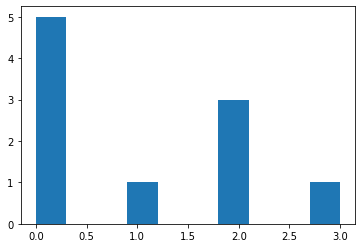

In [ ]:
model = MoneyModel3(10)
for i in range(10):
    model.step()

agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)

(array([434., 287., 173.,  72.,  24.,   7.,   3.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 7 Patch objects>)

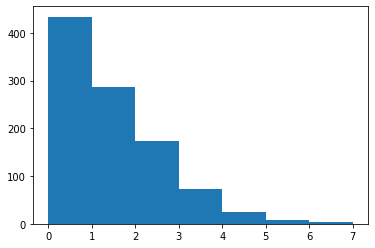

In [ ]:
all_wealth = []
# This runs the model 100 times, each model executing 10 steps.
for j in range(100):
    # Run the model
    model = MoneyModel3(10)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

plt.hist(all_wealth, bins=range(max(all_wealth) + 1))